In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import nltk.corpus
import math
# use natural language toolkit
from nltk.stem.lancaster import LancasterStemmer
import json
import datetime
stemmer = LancasterStemmer()
from numpy import asarray
from numpy import savetxt


In [2]:
import spacy

In [3]:
import plotly

In [4]:
from nltk.tokenize import word_tokenize
from collections import OrderedDict


# I. Dataset preparation

## I.1. Data import

In [5]:
data = pd.read_csv("C:/Users/aromanowicz/Downloads/priv/training_all.csv", sep=';', encoding='UTF-8') 
data_test = pd.read_csv("C:/Users/aromanowicz/Downloads/priv/test_all.csv", sep=';', encoding='UTF-8') 

In [6]:
data

tag                   id  \
0        0  1002881953631290000   
1        0   941785707290546176   
2        0   964910932513214464   
3        0  1044125094795202560   
4        0  1063514274960736256   
...    ...                  ...   
10042    0  1051565624936357888   
10043    0  1041733696972308480   
10044    0   976204660485877761   
10045    0  1006866637184753665   
10046    0   966772138484039681   

                                                 content  
0      Dla mnie faworytem do tytułu będzie Cracovia. ...  
1      @daria_utf @Jagiellonia1920 Brawo ty Daria kib...  
2      @PremierRP @MorawieckiM Super, polski premier ...  
3       @nopawel @90minut_pl Musi. Innej drogi nie mamy.  
4                                                 #NAME?  
...                                                  ...  
10042      @MaciejRogowski Ty zagrasz? Nie wiedziałem ??  
10043  @sierpowy7 @MaciekSerdak A VAR nie miał popraw...  
10044  @dominikpiechota @przeglad Szanowany, bo koleg...  
10045  @sierpowy7 @Chmielevsky10 @EmilKot A kto inny ...  
10046                                             #NAME?  

[10047 rows x 3 columns]

In [7]:
data_test

id  tag  \
0    1060223998360014849    0   
1    1026518840195383298    0   
2    1060146932910305280    0   
3     981426087765987329    0   
4    1052266317997371392    0   
..                   ...  ...   
995  1055884640261734405    0   
996   726850995758718979    0   
997   979628401316286464    0   
998  1053333019371683840    2   
999   989955360105664512    0   

                                               content  
0    @hubert_cieslak Spoko, jak im Duda z Morawieck...  
1    @huralinho @HeelPiTeRo Ale on tu nie miał szan...  
2    @MalgorzataW5 No czy Prezes nie miał racji, mó...  
3    @_Ekstraklasa_ @Cristiano Przecież to nawet ni...  
4    @Dubi9970 @SchwertnerPL Owszem podatki tak. Al...  
..                                                 ...  
995                                             #NAME?  
996  @mzietara7 to oczywiste byłyście dziś zajebist...  
997  @JackUnderhill5 Duda może się przyjąć w białym...  
998                                             #NAME?  
999                                             #NAME?  

[1000 rows x 3 columns]

## I.2 Data exploration and cleaning

In [8]:
#delete empty records
data_clean = data[data.content != '#NAME?']


In [9]:
data_test_clean = data_test[data_test.content != '#NAME?']

In [10]:
data_clean

tag                   id  \
0        0  1002881953631290000   
1        0   941785707290546176   
2        0   964910932513214464   
3        0  1044125094795202560   
5        0  1042446238606651393   
...    ...                  ...   
10041    0   789446876370173952   
10042    0  1051565624936357888   
10043    0  1041733696972308480   
10044    0   976204660485877761   
10045    0  1006866637184753665   

                                                 content  
0      Dla mnie faworytem do tytułu będzie Cracovia. ...  
1      @daria_utf @Jagiellonia1920 Brawo ty Daria kib...  
2      @PremierRP @MorawieckiM Super, polski premier ...  
3       @nopawel @90minut_pl Musi. Innej drogi nie mamy.  
5      Jaki on był fajny xdd pamiętam, że spóźniłam s...  
...                                                  ...  
10041  @K_Stanowski myślisz że innych celebrytów to o...  
10042      @MaciejRogowski Ty zagrasz? Nie wiedziałem ??  
10043  @sierpowy7 @MaciekSerdak A VAR nie miał popraw...  
10044  @dominikpiechota @przeglad Szanowany, bo koleg...  
10045  @sierpowy7 @Chmielevsky10 @EmilKot A kto inny ...  

[8368 rows x 3 columns]

In [11]:
data_test_clean

id  tag  \
0    1060223998360014849    0   
1    1026518840195383298    0   
2    1060146932910305280    0   
3     981426087765987329    0   
4    1052266317997371392    0   
..                   ...  ...   
991   685222914732462080    0   
993  1059187889945370625    2   
994   989485506244333568    0   
996   726850995758718979    0   
997   979628401316286464    0   

                                               content  
0    @hubert_cieslak Spoko, jak im Duda z Morawieck...  
1    @huralinho @HeelPiTeRo Ale on tu nie miał szan...  
2    @MalgorzataW5 No czy Prezes nie miał racji, mó...  
3    @_Ekstraklasa_ @Cristiano Przecież to nawet ni...  
4    @Dubi9970 @SchwertnerPL Owszem podatki tak. Al...  
..                                                 ...  
991  @dusjakub @a_delimat no przecież nie z miłości :)  
993  @SamPereira_ Z kim ty się na łby zamieniłeś, ż...  
994  @pisorgpl @PatrykJaki No to czekam aż warszawk...  
996  @mzietara7 to oczywiste byłyście dziś zajebist...  
997  @JackUnderhill5 Duda może się przyjąć w białym...  

[856 rows x 3 columns]

In [12]:
print('This content has been tagged as not harmful: \n')
cl = data_clean.loc[data_clean.tag == 0, ['content']].sample(10).values
for c in cl:
    print(c[0])

This content has been tagged as not harmful: 

@S_Wikariak Kiedyś u mnie byłeś na urodziny. Dostałam piękny ekspres do kawy. #Pamiętam! :-)
@gd7171 @wroblewski_m Na palacza to nie działa, obawiam się.
@p_kasiura @m_placzkowska @januszewski_m "To nie jest aż taki news". A na priv: "Ale jaja" ??
@MiBiBialonski @WislaKrakowSA @SportINTERIA w końcu ktoś wiarygodny pisze o tym że się jednak coś pozytywnego dzieje w klubie :)
@Marcin_Gadek @a_delimat jest "m.in." więc pewnie ktoś jeszcze będzie ale nie widze sensu brać 3 sr obroncow na lawke
@Najdrozsza Może to byłam ja, tylko po prostu Cię nie widziałam!
@MCH_1906 Szukasz jakiś znany zespół z niższych lig do grania ?:)
dla studenta wrzesień to jest jeden wielki niedzielny wieczór
16 X 1978 - Kard. Karol Wojtyła zostaje wybrany papieżem #JPII - Wanda Rutkiewicz, jako pierwsza Europejka, zdobywa najwyższy szczyt ziemi
@MSzuldrzynski @ElaKonAna Drogi Panie dziennikarz powinien mówić prawdę prosto w oczy.


In [13]:
print('This content has been tagged as cyberbullying: \n')
cl = data_clean.loc[data_clean.tag == 1, ['content']].sample(10).values
for c in cl:
    print(c[0])

This content has been tagged as cyberbullying: 

@johnsmiths74 @urwis1977 @SOKzBURAKApl Jeśli to prawda to niech spi....la.
@DanielWachowiak Facet, to ty i twoi koledzy w kieckach jesteście jedną wielką dewiacją.
@EnergaTorun hehe niech uważa bo jeszcze ktoś uwierzy że będzie stawiał na wychowanki
Bardzo uprzejmie proszę ABW o zainteresowanie się kontem tego człowieka: @KrifaRad A Was proszę o RT.
@anneapplebaum Ja też nazywam. I jeszcze nacjonalistyczną hołotą niegodną tego miejsca.
@LucasPartowitz Wypad parchu z mojej rozmowy. Nie rozmawia z prymitywami o IQ na poziomie temperatury własnego ciała.
@PiotrSzewczykPL @PiotrSidor @SolidarnaPL Wzór, za chowanie pod dywan klechów pedofili z całego świata?
@DamianDukat I pretensje do wszystkich tylko nie do siebie chłopie ty masz grać a nie płakać a jak ci się niepodoba to dyryguj gdzie indziej
@SzJadczak @M_Wawrzynowski @Wychowany_na_X @KiewiczKrz Był testowany to zagrał więcej minut. Używaj czasem mózgu.
@RepublikaTV @KWyszkowski Ty tępa 

In [14]:
print('This content has been tagged as hate speech: \n')
cl = data_clean.loc[data_clean.tag == 2, ['content']].sample(10).values
for c in cl:
    print(c[0])

This content has been tagged as hate speech: 

@PrzemysawMicha2 A chętnie przeczytam co tam za głupoty pierdoli :)
Lubnauer: PiS już się zbliża, już puka do naszych drzwi ale zapomniała, że ciąg dalszy jest taki: pobiegnę go przywitać z radości serce drży
@Gasiuk_Pihowicz Znalazła pani już na siebie pomysł po wyborach ? Bo to ,że nie będzie już pani posłem to wiemy
@bbudka @MorawieckiM Polskę to kompromitują tacy jak ty. Oszołomie.
@krytyka Jest tych debili tutaj trochę
@copone1dak Pan @lis_tomasz chyba chory z urojenia??????
@tvp_info Tak to jest z pomnikami obrońców pedofili
@prezydentpl @niepodlegla Komu? Z fanami naziolami i krzywoprzysięzcą nie świętuję.
@donaldtusk Won niemcu. Sprzedawaliscie wszystko jak leciało a teraz wielcy patrioci. Won!
@PresidentWalesa Idźcie razem w p...u!


In [17]:
df=pd.DataFrame(data=data_clean)

In [18]:
df_test=pd.DataFrame(data=data_test_clean)

In [19]:
#Finalnie mamy 8,3 tys. rekordów
df.shape

(8368, 3)

In [20]:
print('Number of not harmful texts: ', df[df.tag==0].count().content, '\nNumber of textx tagged as cyberbullying: ', df[df.tag==1].count().content, '\nNumber of texts tagged as hate speech: ', df[df.tag==2].count().content)

Number of not harmful texts:  7806 
Number of textx tagged as cyberbullying:  169 
Number of texts tagged as hate speech:  393


In [21]:
pie_chart_data = [df[df.tag==2].count().content, df[df.tag==1].count().content, df[df.tag==0].count().content]
pie_chart_labels = ['Hate speech', 'Cyberbullying', 'Not harmful']

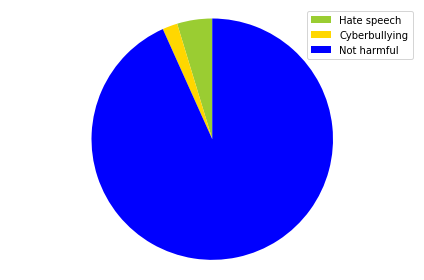

In [22]:
#print(pie_chart_data, pie_chart_labels)

colors = ['yellowgreen', 'gold', 'blue']
patches, texts = plt.pie(pie_chart_data, colors=colors, shadow=False, startangle=90)
plt.legend(patches, pie_chart_labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
import plotly.graph_objects as go
#labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
#values = [4500, 2500, 1053, 500]

fig = go.Figure(data=[go.Pie(labels=pie_chart_labels, values=pie_chart_data)])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0)))
fig.show()

In [22]:
## source: https://www.geeksforgeeks.org/python-removing-unwanted-characters-from-string/
## https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f
bad_chars = ['@', '!', '?', ',', '.', ':', '(', ')', '[', ']', '&', '#', '%', '*', '_', '-', '"', '„', '”']

In [23]:
def remove_puctuation(text):
    no_punct = ''.join([c for c in text if c not in bad_chars])
    return no_punct.lower()

In [24]:
df['content_clean'] = df['content'].apply(lambda x: remove_puctuation(x))

In [25]:
df_test['content_clean'] = df_test['content'].apply(lambda x: remove_puctuation(x))

In [26]:
import pl_core_news_sm
nlp = pl_core_news_sm.load()

In [27]:
final = pd.DataFrame([], columns = ['content', 'tag']) 

for sent in df['content_clean']:
    zdanie =''
    att = nlp(sent)
    for token in att:
        zdanie = zdanie + ' '+ token.lemma_
    df2 = pd.DataFrame({"content":[zdanie]}) 
    final = final.append(df2, ignore_index = True) 

In [28]:
final_test = pd.DataFrame([], columns = ['content', 'tag']) 

for sent in df_test['content_clean']:
    zdanie =''
    att = nlp(sent)
    for token in att:
        zdanie = zdanie + ' '+ token.lemma_
    df2_test = pd.DataFrame({"content":[zdanie]}) 
    final_test = final_test.append(df2_test, ignore_index = True) 

In [29]:
final.tag = df.reset_index().tag

In [30]:
final_test.tag = df_test.reset_index().tag

In [31]:
final_test

content  tag
0     hubertcieslak spoko jak on duda z morawieckim...    0
1     huralinho heelpitero ale on tu nie mieć szans...    0
2     malgorzataw5 no czy prezes nie mieć racja mów...    0
3     ekstraklasa cristiano przecież to nawet nie b...    0
4     dubi9970 schwertnerpl owszem podatek tak ale ...    0
..                                                 ...  ...
851         dusjakub adelimat no przecież nie z miłość    0
852   sampereira z kto ty się na łeb zamieniłeś że ...    2
853   pisorgpl patrykjaki no to czekać aż warszawka...    0
854   mzietara7 to oczywisty byłyście dziś zajebist...    0
855   jackunderhill5 duda móc się przyjąć w biały d...    0

[856 rows x 2 columns]

In [32]:
final['content_clean_hs']=final[final.tag==2]['content']
final['content_clean_cb']=final[final.tag==1]['content']
final['content_clean_no_hs']=final[final.tag==0]['content']

In [33]:
##Czestosc występowania słów
wordstring = ''
for i in final.content:
    wordstring += ' ' + i

In [34]:
##Czestosc występowania słów
wordstring_no_hs = ''
for i in final.content_clean_no_hs:
    if type(i)== str: ##dodaje niepuste wartosci
        wordstring_no_hs += ' ' + i

In [35]:
wordstring_cb = ''
for i in final.content_clean_cb:
    if type(i)== str: ##dodaje niepuste wartosci
        wordstring_cb += ' ' + i

In [36]:
##Czestosc występowania słów
wordstring_hs = ''
for i in final.content_clean_hs:
    if type(i)== str: ##dodaje niepuste wartosci
        wordstring_hs += ' ' + i

In [37]:
from spacy.lang.pl.stop_words import STOP_WORDS
#import spacy
import en_core_web_md
nlp = en_core_web_md.load()

In [38]:
#nltk.download('punkt')

In [39]:
token = word_tokenize(wordstring)
token_hs = word_tokenize(wordstring_hs)
token_cb = word_tokenize(wordstring_cb)
token_no_hs = word_tokenize(wordstring_no_hs)

In [40]:
token2 = []
for i in token:
    if i not in STOP_WORDS:
        token2.append(i)

In [41]:
token2_hs = []
for i in token_hs:
    if i not in STOP_WORDS:
        token2_hs.append(i)

In [42]:
token2_cb = []
for i in token_cb:
    if i not in STOP_WORDS:
        token2_cb.append(i)

In [43]:
token2_no_hs = []
for i in token_no_hs:
    if i not in STOP_WORDS:
        token2_no_hs.append(i)

In [44]:
from nltk.probability import FreqDist
fdist = FreqDist(token2)

In [45]:
fdist_hs = FreqDist(token2_hs)
fdist_cb = FreqDist(token2_cb)
fdist_no_hs = FreqDist(token2_no_hs)

In [46]:
fdist.most_common(20)
    

[('mieć', 1150),
 ('móc', 318),
 ('wiedzieć', 317),
 ('mecz', 283),
 ('chcieć', 256),
 ('dobry', 232),
 ('chyba', 232),
 ('rok', 228),
 ('grać', 220),
 ('justablaszczyk', 179),
 ('swój', 174),
 ('czas', 173),
 ('/', 164),
 ('mówić', 160),
 ('robić', 160),
 ('tvpinfo', 148),
 ('nica', 148),
 ('wislakrakowsa', 147),
 ('xd', 141),
 ('widzieć', 137)]

In [47]:
fdist_hs.most_common(5)

[('mieć', 37),
 ('listomasz', 37),
 ('pisorgpl', 31),
 ('gasiukpihowicz', 30),
 ('morawieckim', 28)]

In [48]:
fdist_cb.most_common(5)

[('mieć', 22),
 ('kwyszkowski', 17),
 ('tvpinfo', 14),
 ('swój', 11),
 ('wiedzieć', 8)]

In [49]:
fdist_no_hs.most_common(5)

[('mieć', 1091),
 ('móc', 297),
 ('wiedzieć', 295),
 ('mecz', 280),
 ('chcieć', 249)]

Oversampling

In [50]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

In [51]:
final

content  tag content_clean_hs  \
0      dla ja faworyt do tytuł będzie cracovia zobac...    0              NaN   
1      dariautf jagiellonia1920 brawo ty daria kibic...    0              NaN   
2      premierrp morawieckim super polski premiera s...    0              NaN   
3           nopawel 90minutpl musić inny droga nie mieć    0              NaN   
4      jaki on być fajny xdd pamiętać że spóźnić się...    0              NaN   
...                                                 ...  ...              ...   
8363   kstanowski myślić że inny celebryta to obchod...    0              NaN   
8364            maciejrogowski ty zagrać nie wiedziałem    0              NaN   
8365   sierpowy7 maciekserdak a var nie mieć poprawi...    0              NaN   
8366   dominikpiechota przeglad szanowany bo kolega ...    0              NaN   
8367   sierpowy7 chmielevsky10 emilkot a kto inny mi...    0              NaN   

     content_clean_cb                                content_clean_no_hs  
0                 NaN   dla ja faworyt do tytuł będzie cracovia zobac...  
1                 NaN   dariautf jagiellonia1920 brawo ty daria kibic...  
2                 NaN   premierrp morawieckim super polski premiera s...  
3                 NaN        nopawel 90minutpl musić inny droga nie mieć  
4                 NaN   jaki on być fajny xdd pamiętać że spóźnić się...  
...               ...                                                ...  
8363              NaN   kstanowski myślić że inny celebryta to obchod...  
8364              NaN            maciejrogowski ty zagrać nie wiedziałem  
8365              NaN   sierpowy7 maciekserdak a var nie mieć poprawi...  
8366              NaN   dominikpiechota przeglad szanowany bo kolega ...  
8367              NaN   sierpowy7 chmielevsky10 emilkot a kto inny mi...  

[8368 rows x 5 columns]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_original = np.array(final['content'])
Y_original = np.array(final['tag'])

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_original, Y_original, test_size=0.1, random_state=42)

In [55]:
alls = len(y_train)
first = len(y_train[y_train==0])
sec = len(y_train[y_train==1])
third = len(y_train[y_train==2])
print(first/alls, 
     sec/alls,
     third/alls)

0.9318815562342319 0.02071438056035055 0.04740406320541761


In [56]:
alls = len(y_val)
first = len(y_val[y_val==0])
sec = len(y_val[y_val==1])
third = len(y_val[y_val==2])
print(first/alls, 
     sec/alls,
     third/alls)

0.9414575866188769 0.015531660692951015 0.043010752688172046


In [57]:
X_train = X_train.reshape(len(X_train),1)

In [58]:
ros = RandomOverSampler(random_state=0)

In [59]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [60]:
print(sorted(Counter(y_train).items()))

[(0, 7018), (1, 156), (2, 357)]


In [61]:
print(sorted(Counter(y_resampled).items()))

[(0, 7018), (1, 7018), (2, 7018)]


In [62]:
final = pd.DataFrame({'content':X_resampled.reshape(len(X_resampled),),
                   'tag':y_resampled
                   }) 

In [63]:
final_valid = pd.DataFrame({'content':X_val.reshape(len(X_val),),
                   'tag':y_val
                   }) 

Przygotowanie danych i worka słów

In [64]:
training_data_col  = [final.columns.values.tolist()]  
training_data = final.values.tolist()
#training_data 

In [65]:
test_data_col  = [final_test.columns.values.tolist()]  
test_data = final_test.values.tolist()
#test data

In [66]:
valid_data_col  = [final_valid.columns.values.tolist()]  
valid_data = final_valid.values.tolist()
#test data

In [67]:
words = []
classes = []
documents = []
ignore_words = ['?']
#i = 0
# loop through each sentence in our training data
for pattern in training_data:
    # tokenize each word in the sentence
    w = nltk.word_tokenize(pattern[0])
    # add to our words list
    words.extend(w)
    # add to documents in our corpus
    documents.append((w, pattern[1]))
    # add to our classes list
    if pattern[0] not in classes:
        classes.append(pattern[1])
   # i=i+1
   # if i > 3000: break 

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = list(set(words))

# remove duplicates
classes = list(set(classes))

print (len(documents), "documents")
print (len(classes), "classes", classes)
#print (len(words), "unique stemmed words", words)

21054 documents
3 classes [0, 1, 2]


In [68]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    training.append(bag)
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    output.append(output_row)

print ("# words", len(words))
print ("# classes", len(classes))

# words 14121
# classes 3


# II. Modelling

### II.1. Neural network

### II.1.1. Function preparation

In [69]:
import numpy as np
import time

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
 
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence) #tutaj byłoby stem owanie
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

def think(sentence, show_details=False):
    x = bow(sentence.lower(), words, show_details)
    if show_details:
        print ("sentence:", sentence, "\n bow:", x)
    # input layer is our bag of words
    l0 = x
    # matrix multiplication of input and hidden layer
    l1 = sigmoid(np.dot(l0, synapse_0))
    # output layer
    l2 = sigmoid(np.dot(l1, synapse_1))
    return l2

In [70]:
def y_train_multiplication(y):
    arr = list(map(list, y))
    for i in range(0,len(arr)):
        for j in range(0,len(arr[i])):
            if j==1 and arr[i][j]==1: 
                arr[i][j] = 2
            elif j==2 and arr[i][j]==1: 
                arr[i][j] = 4
            elif arr[i][j] == 0:
                arr[i][j] = 0.5
    return arr

In [71]:

# ANN and Gradient Descent code from https://iamtrask.github.io//2015/07/27/python-network-part2/
def train(X, y, X_val, y_val, hidden_neurons=10, alpha=1, epochs=50000, dropout=False, dropout_percent=0.5, start_time=''):

    print ("Training with %s neurons, alpha:%s, dropout:%s %s" % (hidden_neurons, str(alpha), dropout, dropout_percent if dropout else '') )
    print ("Input matrix: %sx%s    Output matrix: %sx%s" % (len(X),len(X[0]),1, len(classes)) )
    np.random.seed(1)

    last_mean_error = 1
    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((len(X[0]), hidden_neurons)) - 1
    synapse_1 = 2*np.random.random((hidden_neurons, len(classes))) - 1

    prev_synapse_0_weight_update = np.zeros_like(synapse_0)
    prev_synapse_1_weight_update = np.zeros_like(synapse_1)

    synapse_0_direction_count = np.zeros_like(synapse_0)
    synapse_1_direction_count = np.zeros_like(synapse_1)
    
    accuracy_train = []
    specifity_train = []
    precision_train = []
    
    accuracy_val = []
    specifity_val = []
    precision_val = []
    
    y_true = np.argmax(y, axis=1)
    
    y_true_val = np.argmax(y_val, axis=1)
        
    for j in iter(range(epochs+1)):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
                
        if(dropout):
            layer_1 *= np.random.binomial([np.ones((len(X),hidden_neurons))],1-dropout_percent)[0] * (1.0/(1-dropout_percent))

        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # how much did we miss the target value? 
        #error is larger if we predict 0 instead of 2, smaller if 0-1 or 2 instead of 0 
        layer_2_error = (y - layer_2)*y_train_multiplication(y)
        

        if (j% 100) == 0 and j > 50:
            # if this 10k iteration's error is greater than the last iteration, break out
            if np.mean(np.abs(layer_2_error)) < last_mean_error:
                print ("delta after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))) )
                last_mean_error = np.mean(np.abs(layer_2_error))
            else:
                print ("break:", np.mean(np.abs(layer_2_error)), ">=", last_mean_error )
                break
                
        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
        
        synapse_1_weight_update = (layer_1.T.dot(layer_2_delta))
        synapse_0_weight_update = (layer_0.T.dot(layer_1_delta))
        
        if(j > 0):
            synapse_0_direction_count += np.abs(((synapse_0_weight_update > 0)+0) - ((prev_synapse_0_weight_update > 0) + 0))
            synapse_1_direction_count += np.abs(((synapse_1_weight_update > 0)+0) - ((prev_synapse_1_weight_update > 0) + 0))        
        
        synapse_1 += alpha * synapse_1_weight_update
        synapse_0 += alpha * synapse_0_weight_update
        
        prev_synapse_0_weight_update = synapse_0_weight_update
        prev_synapse_1_weight_update = synapse_1_weight_update
        
        
        ##accuracy etc
        #train 
        
        layer_2_train_preds = np.argmax(layer_2, axis=1)

        results_train = pd.DataFrame({'tag': y_true,
                            'tag_predicted': layer_2_train_preds
                           }) 
        
        TN_train = len(results_train[(results_train['tag_predicted']==results_train['tag']) & (results_train['tag']!=0)])
        FP_train = len(results_train[(results_train['tag_predicted']!=results_train['tag']) & (results_train['tag']!=0)])
        TP_train = len(results_train[(results_train['tag_predicted']==results_train['tag']) & (results_train['tag']==0)])
        FN_train = len(results_train[(results_train['tag_predicted']!=results_train['tag']) & (results_train['tag']==0)])

        accuracy_train.append([j, (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)])
        specifity_train.append([j, TN_train/(TN_train+FP_train)])
        precision_train.append([j, TP_train/(TP_train+FP_train)])
        
        #validation
        
        layer_0_val = X_val
        layer_1_val = sigmoid(np.dot(layer_0_val, synapse_0))
        layer_2_val = sigmoid(np.dot(layer_1_val, synapse_1))
        
        layer_2_val_preds = np.argmax(layer_2_val, axis=1)
        
        results_val = pd.DataFrame({'tag': y_true_val,
                            'tag_predicted': layer_2_val_preds
                           }) 
    
        TN_val = len(results_val[(results_val['tag_predicted']==results_val['tag']) & (results_val['tag']!=0)])
        FP_val = len(results_val[(results_val['tag_predicted']!=results_val['tag']) & (results_val['tag']!=0)])
        TP_val = len(results_val[(results_val['tag_predicted']==results_val['tag']) & (results_val['tag']==0)])
        FN_val = len(results_val[(results_val['tag_predicted']!=results_val['tag']) & (results_val['tag']==0)])

        accuracy_val.append([j, (TP_val+TN_val)/(TP_val+TN_val+FP_val+FN_val)])
        specifity_val.append([j, TN_val/(TN_val+FP_val)])
        precision_val.append([j, TP_val/(TP_val+FP_val)])
        
        

    now = datetime.datetime.now()

    # persist synapses
    synapse = {'synapse0': synapse_0.tolist(), 'synapse1': synapse_1.tolist(),
               'datetime': now.strftime("%Y-%m-%d %H:%M"),
               'words': words,
               'classes': classes
              }
    synapse_file = "synapses_alpha_"+str(alpha)+"_epochs_"+str(epochs)+"_neurons_"+str(hidden_neurons)+"_dropout_"+str(dropout)+"_"+str(dropout_percent)+'_time_'+str(start_time)+".json"

    with open(synapse_file, 'w') as outfile:
        json.dump(synapse, outfile, indent=4, sort_keys=True)
    print ("saved synapses to:", synapse_file)
    
    return accuracy_train, specifity_train, precision_train, accuracy_val, specifity_val, precision_val

In [75]:
validation=[]
for sent in valid_data:
    validation.append(bow(sent[0],words))

In [73]:
X = np.array(training)
y = np.array(output)

In [76]:
X_val = np.array(validation)

### II.1.2. Optimal parameter values

#### Looking for alpha parameter

In [922]:
alphas = [0.001,0.01,0.1,0.2,0.5,0.8,1,10,50,100]

results = []

for alpha_value in alphas:
    print ("\nTraining With Alpha:", str(alpha_value), '\n')
    start_time_ctm = time.time()
    results_of_training = train(X, y, X_val, y_val, hidden_neurons=20, alpha=alpha_value, epochs=500, dropout=True, dropout_percent=0.1, start_time=str(start_time_ctm))
    results.append([alpha_value, start_time_ctm, results_of_training])
    
    elapsed_time = time.time() - start_time_ctm
    print ("processing time:", elapsed_time, "seconds")


Training With Alpha: 0.001 

Training with 20 neurons, alpha:0.001, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.2722024691253652
delta after 200 iterations:0.16895515190112192
delta after 300 iterations:0.1200791711122556
delta after 400 iterations:0.09226299779320482
delta after 500 iterations:0.07447943166326193
saved synapses to: synapses_alpha_0.001_epochs_500_neurons_20_dropout_True_0.1_time_1593720518.3349504.json
processing time: 1601.902455329895 seconds

Training With Alpha: 0.01 

Training with 20 neurons, alpha:0.01, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3333333382232108
break: 0.333333350041184 >= 0.3333333382232108
saved synapses to: synapses_alpha_0.01_epochs_500_neurons_20_dropout_True_0.1_time_1593722120.238372.json
processing time: 645.0561811923981 seconds

Training With Alpha: 0.1 

Training with 20 neurons, alpha:0.1, dropout:True 0.1
Input matrix: 21054x14121 

C:\Users\aromanowicz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in exp



delta after 100 iterations:0.3333333333333333
break: 0.3333333333333333 >= 0.3333333333333333
saved synapses to: synapses_alpha_0.5_epochs_500_neurons_20_dropout_True_0.1_time_1593724035.2294803.json
processing time: 633.3398659229279 seconds

Training With Alpha: 0.8 

Training with 20 neurons, alpha:0.8, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3333333333333333
break: 0.3333333333333333 >= 0.3333333333333333
saved synapses to: synapses_alpha_0.8_epochs_500_neurons_20_dropout_True_0.1_time_1593724668.5693462.json
processing time: 632.5193479061127 seconds

Training With Alpha: 1 

Training with 20 neurons, alpha:1, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3333333333333333
break: 0.3333333333333333 >= 0.3333333333333333
saved synapses to: synapses_alpha_1_epochs_500_neurons_20_dropout_True_0.1_time_1593725301.089652.json
processing time: 632.7186651229858 seconds

Training With Alp

In [956]:
results_alpha = list(map(list, results))

In [1195]:
for j in range(0,len(results_alpha)):
    for k in range(0,len(results_alpha[j][2])):
        savetxt('results_alpha drop '+str(results_alpha[j][0])+'part '+str(k)+'.csv', results_alpha[j][2][k], delimiter=',')
    

#### hidden neurons parameter

In [958]:
neurons = [10,20,30,40,50]
results = []

for neuron in neurons:
    print ("\nTraining With Alpha:", str(alpha_value), '\n')
    start_time_ctm = time.time()
    results_of_training = train(X, y, X_val, y_val, hidden_neurons=neuron, alpha=0.001, epochs=500, dropout=True, dropout_percent=0.1, start_time=str(start_time_ctm))
    results.append([alpha_value, start_time_ctm, results_of_training])
    
    elapsed_time = time.time() - start_time_ctm
    print ("processing time:", elapsed_time, "seconds")


Training With Alpha: 100 

Training with 10 neurons, alpha:0.001, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3431649920778635
delta after 200 iterations:0.2037055746612599
delta after 300 iterations:0.14641164830500034
delta after 400 iterations:0.11853890484760592
delta after 500 iterations:0.09918166259504231
saved synapses to: synapses_alpha_0.001_epochs_500_neurons_10_dropout_True_0.1_time_1593758478.847459.json
processing time: 1624.3629360198975 seconds

Training With Alpha: 100 

Training with 20 neurons, alpha:0.001, dropout:True 0.1
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.2722024691253652
delta after 200 iterations:0.16895515190112192
delta after 300 iterations:0.1200791711122556
delta after 400 iterations:0.09226299779320482
delta after 500 iterations:0.07447943166326193
saved synapses to: synapses_alpha_0.001_epochs_500_neurons_20_dropout_True_0.1_time_1593760103.212356.json
processing t

In [965]:
results_neurons = list(map(list, results))

In [1194]:
for j in range(0,len(results_neurons)):
    for k in range(0,len(results_neurons[j][2])):
        savetxt('results_neurons drop '+str(results_neurons[j][0])+'part '+str(k)+'.csv', results_neurons[j][2][k], delimiter=',')
    

#### dropout parameter

In [1098]:
drops = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
results = []

for drop in drops:
    print ("\nTraining With dropout:", str(drop), '\n')
    start_time_ctm = time.time()
    results_of_training = train(X, y, X_val, y_val, hidden_neurons=30, alpha=0.001, epochs=500, dropout=True, dropout_percent=drop, start_time=str(start_time_ctm))
    results.append([drop, start_time_ctm, results_of_training])
    
    elapsed_time = time.time() - start_time_ctm
    print ("processing time:", elapsed_time, "seconds")


Training With dropout: 0 

Training with 30 neurons, alpha:0.001, dropout:True 0
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3428447117068495
delta after 200 iterations:0.12138799156645422
delta after 300 iterations:0.06729749121929104
delta after 400 iterations:0.04798779082651128
delta after 500 iterations:0.03802460773820464
saved synapses to: synapses_alpha_0.001_epochs_500_neurons_30_dropout_True_0_time_1593783671.0167456.json
processing time: 1651.8693509101868 seconds

Training With dropout: 0.05 

Training with 30 neurons, alpha:0.001, dropout:True 0.05
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.3369886722941204
delta after 200 iterations:0.1529615054305508
delta after 300 iterations:0.08667250240010657
delta after 400 iterations:0.05951172308011604
delta after 500 iterations:0.04583535067668895
saved synapses to: synapses_alpha_0.001_epochs_500_neurons_30_dropout_True_0.05_time_1593785322.8860965.json
processi

In [1099]:
results_dropout = list(map(list, results))

In [1193]:
for j in range(0,len(results_dropout)):
    for k in range(0,len(results_dropout[j][2])):
        savetxt('results_dropout drop '+str(results_dropout[j][0])+'part '+str(k)+'.csv', results_dropout[j][2][k], delimiter=',')
    

#### accuracy and specifity charts

##### Dropout

In [1004]:
for j in range(0,len(results_dropout)):
    results_dropout[j][0] = drops[j]

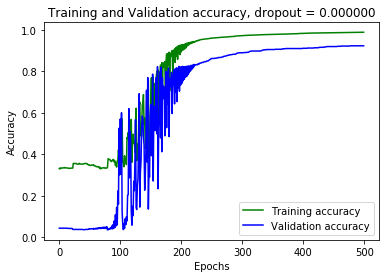

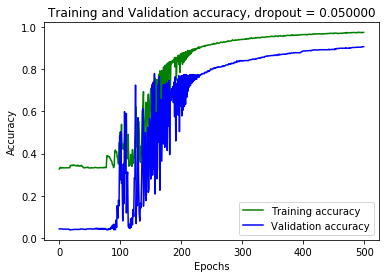

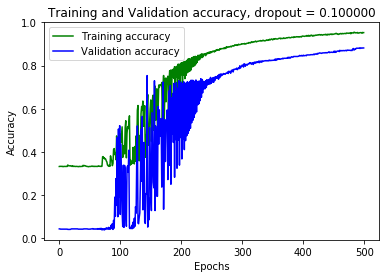

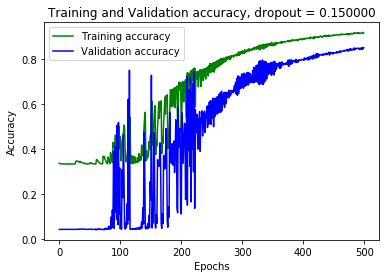

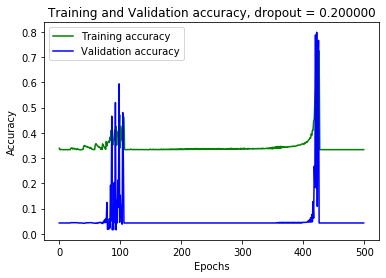

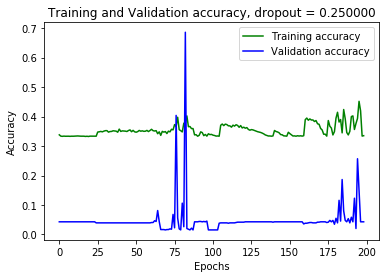

In [1100]:
   # j=0
for j in range(0,len(results_dropout))   : 
    accuracy_val = []
    for i in range(0,len(results_dropout[j][2][3])-1):
        accuracy_val.append(results_dropout[j][2][3][i][1])
    accuracy_train = []
    for i in range(0,len(results_dropout[j][2][0])-1):
        accuracy_train.append(results_dropout[j][2][0][i][1])
    epochs = range(0,len(results_dropout[j][2][0])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy, dropout = %f' %results_dropout[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_dropout %f.png'  %results_dropout[j][0])
    plt.show()

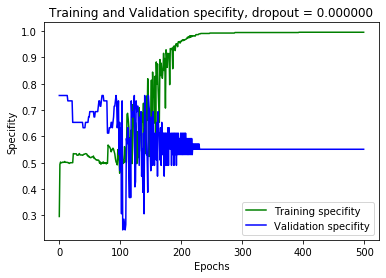

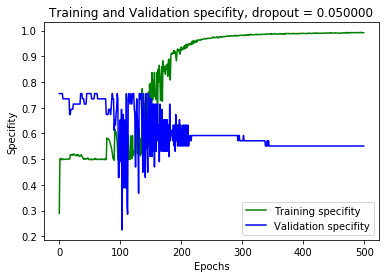

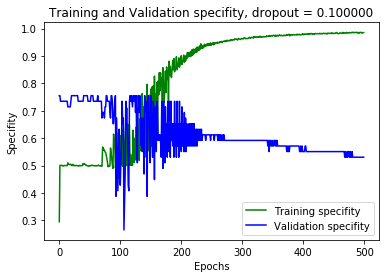

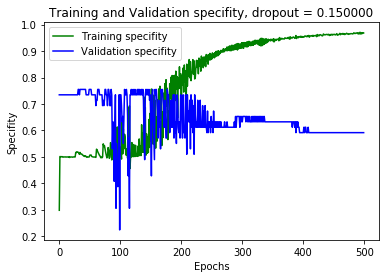

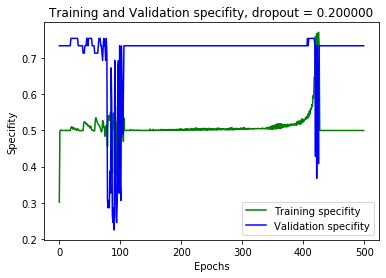

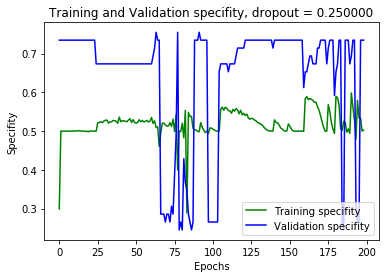

In [1101]:
for j in range(0,len(results_dropout))   : 
    accuracy_val = []
    for i in range(0,len(results_dropout[j][2][4])-1):
        accuracy_val.append(results_dropout[j][2][4][i][1])
    accuracy_train = []
    for i in range(0,len(results_dropout[j][2][1])-1):
        accuracy_train.append(results_dropout[j][2][1][i][1])
    epochs = range(0,len(results_dropout[j][2][1])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training specifity')
    plt.plot(epochs, accuracy_val, 'b', label='Validation specifity')
    plt.title('Training and Validation specifity, dropout = %f' %results_dropout[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Specifity')
    plt.legend()
    plt.savefig('specifity_dropout %f.png'  %results_dropout[j][0])
    plt.show()


##### Hidden neurons

In [967]:
for j in range(0,len(results_neurons)):
    results_neurons[j][0] = neurons[j]

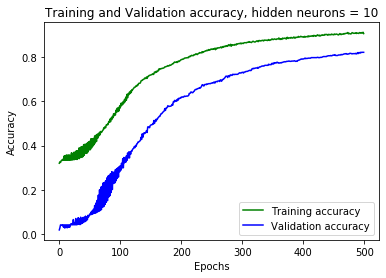

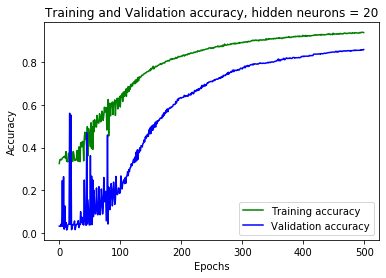

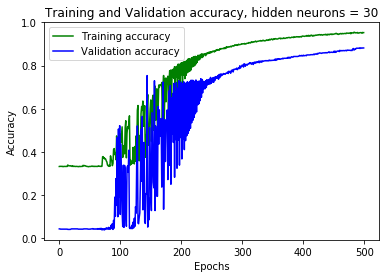

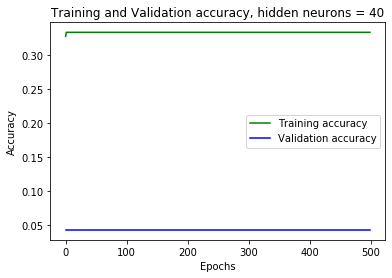

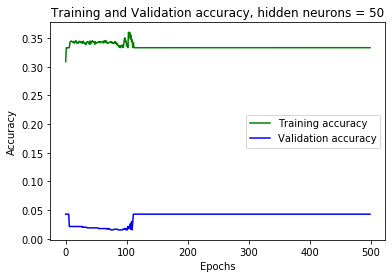

In [1073]:
for j in range(0,len(results_neurons))   : 
    accuracy_val = []
    for i in range(0,len(results_neurons[j][2][3])-1):
        accuracy_val.append(results_neurons[j][2][3][i][1])
    accuracy_train = []
    for i in range(0,len(results_neurons[j][2][0])-1):
        accuracy_train.append(results_neurons[j][2][0][i][1])
    epochs = range(0,500)
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy, hidden neurons = %i' %results_neurons[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_neurons %i.png'  %results_neurons[j][0])
    plt.show()

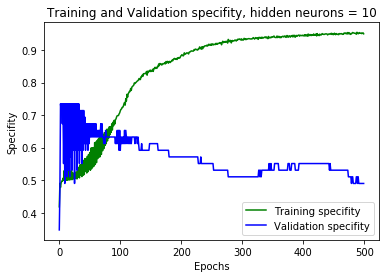

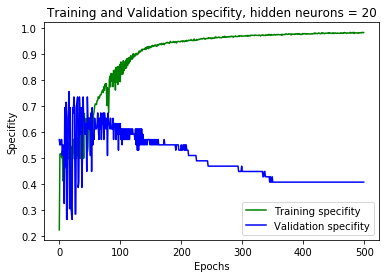

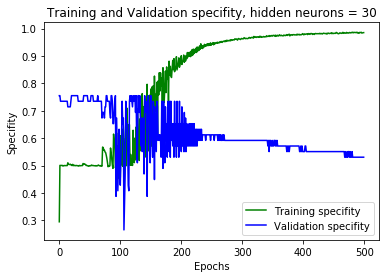

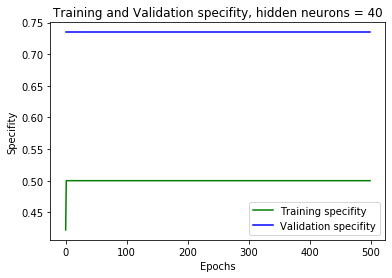

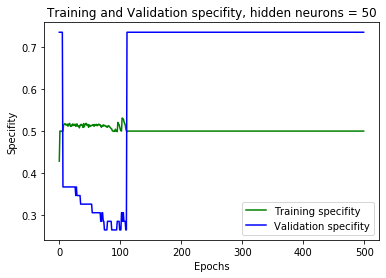

In [1074]:
for j in range(0,len(results_neurons))   : 
    accuracy_val = []
    for i in range(0,len(results_neurons[j][2][4])-1):
        accuracy_val.append(results_neurons[j][2][4][i][1])
    accuracy_train = []
    for i in range(0,len(results_neurons[j][2][1])-1):
        accuracy_train.append(results_neurons[j][2][1][i][1])
    epochs = range(0,500)
    plt.plot(epochs, accuracy_train, 'g', label='Training specifity')
    plt.plot(epochs, accuracy_val, 'b', label='Validation specifity')
    plt.title('Training and Validation specifity, hidden neurons = %i' %results_neurons[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Specifity')
    plt.legend()
    plt.savefig('specifity_neurons %i.png'  %results_neurons[j][0])
    plt.show()


##### Alpha

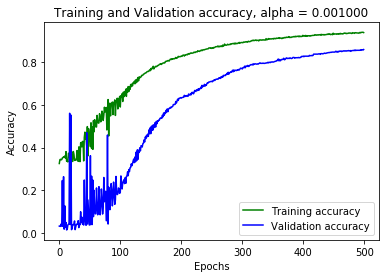

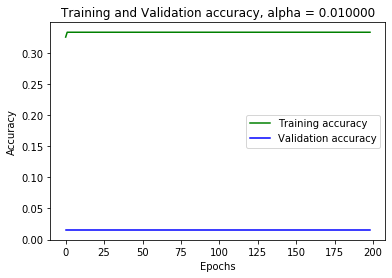

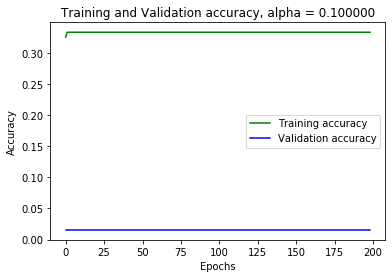

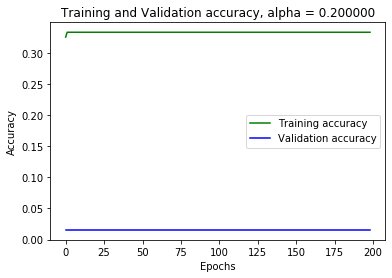

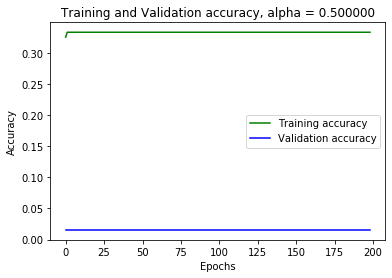

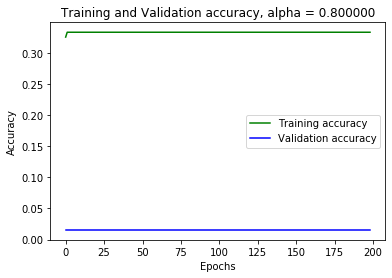

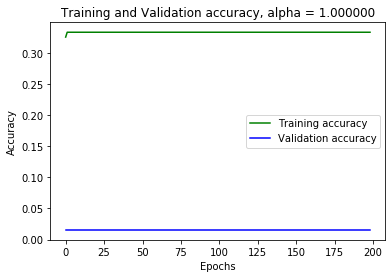

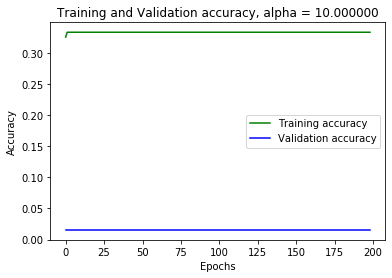

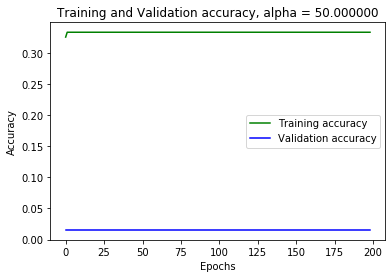

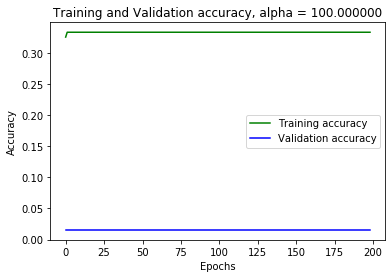

In [1075]:
for j in range(0,len(results_alpha))   : 
    accuracy_val = []
    for i in range(0,len(results_alpha[j][2][3])-1):
        accuracy_val.append(results_alpha[j][2][3][i][1])
    accuracy_train = []
    for i in range(0,len(results_alpha[j][2][0])-1):
        accuracy_train.append(results_alpha[j][2][0][i][1])
    epochs = range(0,len(results_alpha[j][2][4])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy, alpha = %f' %results_alpha[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_alpha = %f.png'  %results_alpha[j][0])
    plt.show()

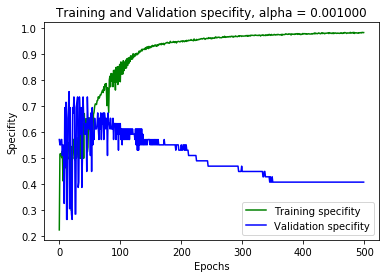

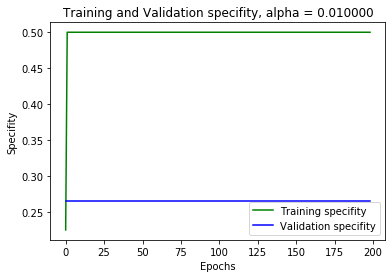

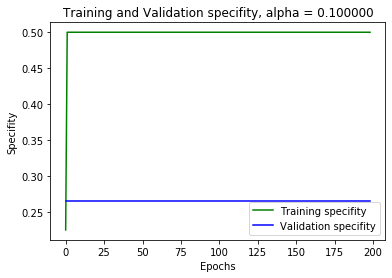

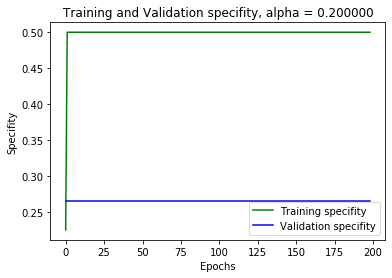

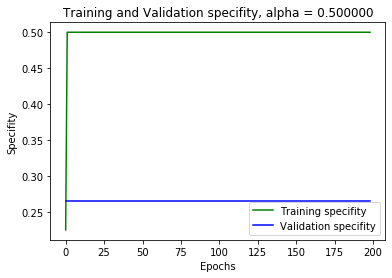

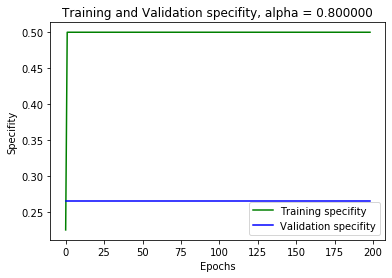

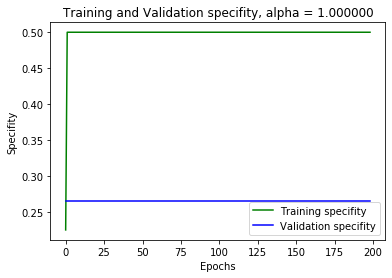

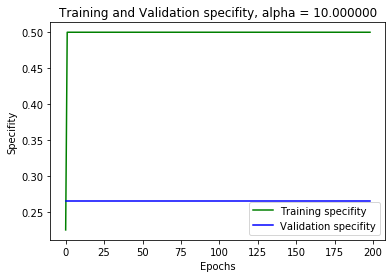

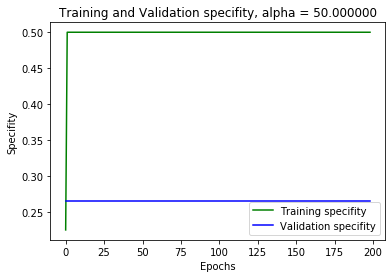

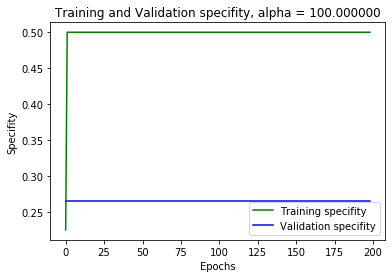

In [1076]:
for j in range(0,len(results_alpha))   : 
    accuracy_val = []
    for i in range(0,len(results_alpha[j][2][4])-1):
        accuracy_val.append(results_alpha[j][2][4][i][1])
    accuracy_train = []
    for i in range(0,len(results_alpha[j][2][1])-1):
        accuracy_train.append(results_alpha[j][2][1][i][1])
    epochs = range(0,len(results_alpha[j][2][4])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training specifity')
    plt.plot(epochs, accuracy_val, 'b', label='Validation specifity')
    plt.title('Training and Validation specifity, alpha = %f' %results_alpha[j][0])
    plt.xlabel('Epochs')
    plt.ylabel('Specifity')
    plt.legend()
    plt.savefig('specifity_alpha %f.png'  %results_alpha[j][0])
    plt.show()


### II.1.3 Model training and results

In [1220]:
start_time = time.time()

train_400 = train(X, y, X_val, y_val, hidden_neurons=30, alpha=0.001, epochs=400, dropout=True, dropout_percent=0.15, start_time=start_time)

elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

Training with 30 neurons, alpha:0.001, dropout:True 0.15
Input matrix: 21054x14121    Output matrix: 1x3
delta after 100 iterations:0.38162771368750487
delta after 200 iterations:0.242826296793277
delta after 300 iterations:0.15495769109332844
delta after 400 iterations:0.11624933544167966
saved synapses to: synapses_alpha_0.001_epochs_400_neurons_30_dropout_True_0.15_time_1593866303.8157814.json
processing time: 1670.1932740211487 seconds


In [1239]:
results_train_400 = list(map(list, train_400))

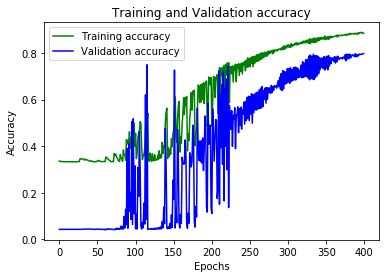

In [1240]:
 
    accuracy_val = []
    for i in range(0,len(results_train_400[3])-1):
        accuracy_val.append(results_train_400[3][i][1])
    accuracy_train = []
    for i in range(0,len(results_train_400[0])-1):
        accuracy_train.append(results_train_400[0][i][1])
    epochs = range(0,len(results_train_400[4])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_400')
    plt.show()

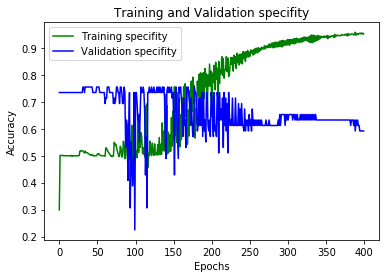

In [1241]:
 
    accuracy_val = []
    for i in range(0,len(results_train_400[4])-1):
        accuracy_val.append(results_train_400[4][i][1])
    accuracy_train = []
    for i in range(0,len(results_train_400[1])-1):
        accuracy_train.append(results_train_400[1][i][1])
    epochs = range(0,len(results_train_400[4])-1)
    plt.plot(epochs, accuracy_train, 'g', label='Training specifity')
    plt.plot(epochs, accuracy_val, 'b', label='Validation specifity')
    plt.title('Training and Validation specifity')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('specifity_400')
    plt.show()

In [1242]:
for j in range(0,len(results_train_400)):
    savetxt('results_400 part %i.csv' %j, results_train_400[j], delimiter=',')


In [1221]:

# probability threshold
ERROR_THRESHOLD = 0.2
# load our calculated synapse values
synapse_file = 'synapses_alpha_0.001_epochs_400_neurons_30_dropout_True_0.15_time_1593866303.8157814.json' 
with open(synapse_file) as data_file: 
    synapse = json.load(data_file) 
    synapse_0 = np.asarray(synapse['synapse0']) 
    synapse_1 = np.asarray(synapse['synapse1'])

def classify(sentence, show_details=False):
    results = think(sentence, show_details)

    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD ] 
    results.sort(key=lambda x: x[1], reverse=True) 
    return_results =[[classes[r[0]],r[1]] for r in results]
    print ("%s \n classification: %s" % (sentence, return_results))
    return return_results



#### Test set results

In [1233]:
def max_value(inputlist):
    return max([sublist[-1] for sublist in inputlist])

In [1225]:
predicted = []
for sentence in final_test['content']:
    predicted.append(classify(sentence))

 hubertcieslak spoko jak on duda z morawieckim zamówić po pięć piwo ten wszystko będzie ok 
 classification: [[2, 0.9852472418713534], [0, 0.3150697903237534]]
 huralinho heelpitero ale on tu nie mieć szansa on zagranie a ten ' proba ' to czysty prowizorka 
 classification: [[0, 0.961769819727922]]
 malgorzataw5 no czy prezes nie mieć racja mówiącze to być zdradziecki morda no czy nie mieć racja 
 classification: [[0, 0.8964454849132922]]
 ekstraklasa cristiano przecież to nawet nie być przewrotka 
 classification: [[0, 0.9738728852463169]]
 dubi9970 schwertnerpl owszem podatek tak ale nie w taki okoliczność czemu małysza odpalić z team orlen 
 classification: [[0, 0.9547175896839946], [2, 0.5908418520105041]]
 matysiakd ksw611 skąd wiedzieć jaki skendija mieć budżet skoro mówić że być bogaty   tylko dwa zawodnik ponoć dobrze zarabiać 
 classification: [[0, 0.8897098515802817]]
 z to co widzieć to kibic widzewa mieć szczęście że trwać mundial dzięki to ogólnopolski szydera być tylko z 

In [1226]:
predictions = []
for preds in predicted:
    for elem in range(len(preds)):
        if preds[elem][-1] == max_value(preds):
            predicted_class = preds[elem][0]
    #print(predicted_class)
    predictions.append(predicted_class)

In [1227]:
test_final = pd.DataFrame({'content':final_test['content'],
                   'tag':final_test['tag'],
                    'tag_predicted': predictions
                   }) 

In [1228]:
#test set
TN = len(test_final[(test_final['tag_predicted']==test_final['tag']) & (test_final['tag']!=0)])
FP = len(test_final[(test_final['tag_predicted']!=test_final['tag']) & (test_final['tag']!=0)])
TP = len(test_final[(test_final['tag_predicted']==test_final['tag']) & (test_final['tag']==0)])
FN = len(test_final[(test_final['tag_predicted']!=test_final['tag']) & (test_final['tag']==0)])


In [1253]:
len(test_final[(test_final['tag_predicted']!=test_final['tag']) & (test_final['tag']==2) & (test_final['tag_predicted']==0)])

24

In [1229]:
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [1230]:
specifity

0.5217391304347826

In [1231]:
acc

0.8282710280373832

In [1232]:
precision

0.9375886524822695

---

## III. Naive Bayess classifier

In [74]:
from sklearn.naive_bayes import BernoulliNB
y_m = np.argmax(y, axis=1)
results_bnb = []
alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for alpha in alphas:    
    BNBclf = BernoulliNB(alpha=alpha, binarize = None)
    bnb_model = BNBclf.fit(X, y_m)
    
    y_train_pred = bnb_model.predict(X)
    y_valid_pred = bnb_model.predict(X_val)
    
    predicted_train = []
    predicted_valid = []
    
    for j in range(0,len(final['content'])):
        predicted_train.append(BNBclf.predict(bow(final['content'][j], words).reshape(1,-1))[0])
    for j in range(0,len(final_valid['content'])):
        predicted_valid.append(BNBclf.predict(bow(final_valid['content'][j], words).reshape(1,-1))[0])    
    valid_final = pd.DataFrame({
                       'tag':final_valid['tag'],
                        'tag_predicted': predicted_valid
                       }) 
    train_final = pd.DataFrame({
                       'tag':final['tag'],
                        'tag_predicted': predicted_train
                       }) 
    TN_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
    FP_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
    TP_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
    FN_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
    
    TN_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']!=0)])
    FP_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']!=0)])
    TP_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']==0)])
    FN_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']==0)])
    
    specifity_train =TN_train/(TN_train+FP_train)
    acc_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
    precision_train = TP_train/(TP_train+FP_train)
    
    specifity_valid =TN_valid/(TN_valid+FP_valid)
    acc_valid = (TP_valid+TN_valid)/(TP_valid+TN_valid+FP_valid+FN_valid)
    precision_valid = TP_valid/(TP_valid+FP_valid)
    
    
    results_bnb.append([alpha, specifity_train, acc_train, precision_train, specifity_valid, acc_valid, precision_valid])

In [75]:
accuracy_val = []
accuracy_train = []
specifity_val  = []
specifity_train = []
alphas = []

for j in range(0,len(results_bnb))   : 
    accuracy_val.append(results_bnb[j][5])
    accuracy_train.append(results_bnb[j][2])
    specifity_val.append(results_bnb[j][4])
    specifity_train.append(results_bnb[j][1])
    alphas.append(results_bnb[j][0])

In [76]:
results_bnb_summary = pd.DataFrame({
                       'tag':final_valid['tag'],
                        'tag_predicted': predicted_valid
                       }) 

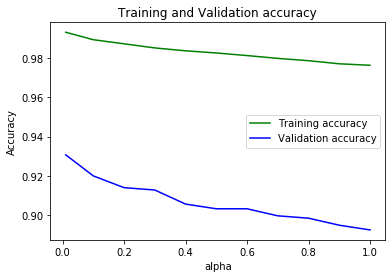

In [77]:
    plt.plot(alphas, accuracy_train, 'g', label='Training accuracy')
    plt.plot(alphas, accuracy_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_alpha_bnb1.png')
    plt.show()

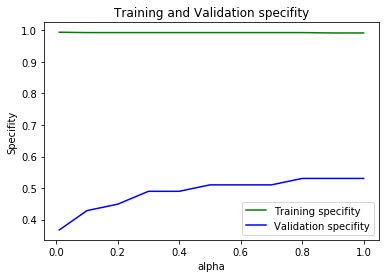

In [78]:
    plt.plot(alphas, specifity_train, 'g', label='Training specifity')
    plt.plot(alphas, specifity_val, 'b', label='Validation specifity')
    plt.title('Training and Validation specifity')
    plt.xlabel('alpha')
    plt.ylabel('Specifity')
    plt.legend()
    plt.savefig('specifity_alpha_bnb1.png')
    plt.show()

In [95]:
start_time = time.time()
BNBclf = BernoulliNB(alpha=0.8, binarize = None)
bnb_model = BNBclf.fit(X, y_m)
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

processing time: 26.062484979629517 seconds


In [96]:
predicted = []
for j in range(0,len(final_test['content'])):
    predicted.append(BNBclf.predict(bow(final_test['content'][j], words).reshape(1,-1))[0])

In [97]:
test_final = pd.DataFrame({
                   'tag':final_test['tag'],
                    'tag_predicted': predicted
                   }) 

In [98]:
TN = len(test_final[(test_final['tag_predicted']==test_final['tag']) & (test_final['tag']!=0)])
FP = len(test_final[(test_final['tag_predicted']!=test_final['tag']) & (test_final['tag']!=0)])
TP = len(test_final[(test_final['tag_predicted']==test_final['tag']) & (test_final['tag']==0)])
FN = len(test_final[(test_final['tag_predicted']!=test_final['tag']) & (test_final['tag']==0)])


In [99]:
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [100]:
acc

0.866822429906542

In [101]:
specifity

0.41304347826086957

In [1268]:
len(test_final[(test_final['tag_predicted']==test_final['tag']) & (test_final['tag']==0)])

704

## IV. SVM

In [70]:
from sklearn import svm
#from sklearn.metrics import accuracy_score

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
y_m = np.argmax(y, axis=1)

### Linear

In [79]:
start_time = time.time()
SVM_linear = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_linear.fit(X,y_m)
# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

processing time: 2308.837122440338 seconds


In [80]:
predicted_svm_linear2 = []
for j in range(0,len(X_val)):
    predicted_svm_linear2.append(SVM_linear.predict(X_val[j].reshape(1,-1))[0])
    #predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_linear2, y_val)*100)

SVM Accuracy Score ->  95.22102747909199


In [81]:
valid_final = pd.DataFrame({
                   'tag':final_test['tag'],
                    'tag_predicted': predicted_svm_linear
                   }) 

NameError: name 'predicted_svm_linear' is not defined

In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])

In [ ]:
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [ ]:
results_linear_acc = acc
results_linear_spec =  specifity

In [ ]:
results_linear_spec

### Poly

In [ ]:
start_time = time.time()

SVM_poly = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
SVM_poly.fit(X,y_m)

# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

In [ ]:
predicted_svm_poly2 = []
for j in range(0,len(X_val)):
    predicted_svm_poly2.append(SVM_poly.predict(X_val[j].reshape(1,-1))[0])
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_poly2, y_val)*100)

In [ ]:
valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_poly2
                   }) 

In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])

In [ ]:
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [ ]:
results_poly_acc = acc
results_poly_spec =specifity

In [ ]:
results_poly_spec

### RBF

In [ ]:
start_time = time.time()

SVM_rbf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM_rbf.fit(X,y_m)

# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

In [ ]:
predicted_svm_rbf2 = []
for j in range(0,len(X_val)):
    predicted_svm_rbf2.append(SVM_rbf.predict(X_val[j].reshape(1,-1))[0])
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf2, y_val)*100)

In [ ]:
valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_rbf2
                   }) 

In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [ ]:
results_rbf_acc = acc
results_rbf_spec = specifity

### Sigmoid

In [ ]:
start_time = time.time()

SVM_sigmoid = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
SVM_sigmoid.fit(X,y_m)

# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

In [ ]:
predicted_svm_sigmoid2 = []
for j in range(0,len(X_val)):
    predicted_svm_sigmoid2.append(SVM_sigmoid.predict(X_val[j].reshape(1,-1))[0])
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_sigmoid2, y_val)*100)

In [ ]:
valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_sigmoid2
                   }) 

In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [ ]:
results_sigmoid_acc = acc
results_sigmoid_spec = specifity

### RBF 

In [ ]:
#zmiana gamma z "auto" na "scale"
start_time = time.time()

SVM_rbf2 = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
SVM_rbf2.fit(X,y_m)

# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

In [ ]:
predicted_svm_rbf22 = []
for j in range(0,len(X_val)):
    predicted_svm_rbf22.append(SVM_rbf2.predict(X_val[j].reshape(1,-1))[0])
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf22, y_val)*100)

In [ ]:
valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_rbf22
                   }) 

In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

In [ ]:
results_rbf_acc2 = acc
results_rbf_spec2 = specifity

In [ ]:
results_rbf_acc2

In [ ]:
results_rbf_spec2

In [ ]:
# zmiana class_weight na balanced
start_time = time.time()

SVM_rbf2 = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', class_weight = 'balanced')
SVM_rbf2.fit(X,y_m)

# predict the labels on validation dataset
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

In [ ]:
predicted_svm_rbf = []
for j in range(0,len(X_val)):
    predicted_svm_rbf.append(SVM_rbf2.predict(X_val[j].reshape(1,-1))[0])
print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf, y)*100)


In [ ]:
valid_final = pd.DataFrame({
                   'tag':y,
                    'tag_predicted': predicted_svm_rbf
                   }) 


In [ ]:
TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)


results_rbf_acc3 = acc
results_rbf_spec3 = specifity

In [ ]:
results_rbf_acc3

In [ ]:
results_rbf_spec3

In [ ]:
results_svc_gamma = []
gammas = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 100]

for gamma in gammas:    
    start_time = time.time()
    SVM_rbf_gamma = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=gamma)
    SVM_rbf_gamma.fit(X,y_m)
    
    train_time = time.time() - start_time
    print ("train time for gamma=", gamma, " : ", train_time, "seconds")
    
    predicted_svm_rbf_gamma_train = []
    for j in range(0,len(X)):
        predicted_svm_rbf_gamma_train.append(SVM_rbf_gamma.predict(X[j].reshape(1,-1))[0])
    #print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf_gamma_train, y)*100)
    
    
    predicted_svm_rbf_gamma_valid = []
    for j in range(0,len(X_val)):
        predicted_svm_rbf_gamma_valid.append(SVM_rbf_gamma.predict(X_val[j].reshape(1,-1))[0])
    #print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf_gamma_valid, y_val)*100)
    
    valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_rbf_gamma_valid
                   }) 
    
    train_final = pd.DataFrame({
                       'tag':final['tag'],
                        'tag_predicted': predicted_svm_rbf_gamma_train
                       })                   
    TN_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
    FP_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
    TP_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
    FN_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
    
    TN_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']!=0)])
    FP_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']!=0)])
    TP_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']==0)])
    FN_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']==0)])
    
    specifity_train =TN_train/(TN_train+FP_train)
    acc_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
    precision_train = TP_train/(TP_train+FP_train)
    
    specifity_valid =TN_valid/(TN_valid+FP_valid)
    acc_valid = (TP_valid+TN_valid)/(TP_valid+TN_valid+FP_valid+FN_valid)
    precision_valid = TP_valid/(TP_valid+FP_valid)
                       
    results_svc_gamma.append([gamma, specifity_train, acc_train, precision_train, specifity_valid, acc_valid, precision_valid])
                       
    print(results_svc_gamma)              
                       
    elapsed_time = time.time() - start_time
    print ("processing time for gamma=", gamma, " : ", elapsed_time, "seconds")

In [ ]:
accuracy_val = []
accuracy_train = []
specifity_val  = []
specifity_train = []
gammas = []

for j in range(0,len(results_svc_gamma)-2)   : 
    accuracy_val.append(results_svc_gamma[j][5])
    accuracy_train.append(results_svc_gamma[j][2])
    specifity_val.append(results_svc_gamma[j][4])
    specifity_train.append(results_svc_gamma[j][1])
    gammas.append(results_svc_gamma[j][0])
    
plt.plot(gammas, accuracy_train, 'g', label='Training accuracy')
plt.plot(gammas, accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_svc_gamma_rbf.png')
plt.show()
    
plt.plot(gammas, specifity_train, 'g', label='Training specifity')
plt.plot(gammas, specifity_val, 'b', label='Validation specifity')
plt.title('Training and Validation specifity')
plt.xlabel('gamma')
plt.ylabel('Specifity')
plt.legend()
plt.savefig('specifity_svc_gamma_rbf.png')
plt.show()

In [ ]:
results_svc_c = []
c_values = [0.01, 0.1, 10, 100]

for c_value in c_values:    
    start_time = time.time()
    SVM_rbf_c = svm.SVC(C=c_value, kernel='rbf', degree=3, gamma=0.01)
    SVM_rbf_c.fit(X,y_m)
    
    train_time = time.time() - start_time
    print ("train time for C=", c_value, " : ", train_time, "seconds")
    
    predicted_svm_rbf_c_train = []
    for j in range(0,len(X)):
        predicted_svm_rbf_c_train.append(SVM_rbf_c.predict(X[j].reshape(1,-1))[0])
        
    predicted_svm_rbf_c_valid = []
    for j in range(0,len(X_val)):
        predicted_svm_rbf_c_valid.append(SVM_rbf_c.predict(X_val[j].reshape(1,-1))[0])
    
    valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_rbf_c_valid
                   }) 
    
    train_final = pd.DataFrame({
                       'tag':final['tag'],
                        'tag_predicted': predicted_svm_rbf_c_train
                       })                   
    TN_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
    FP_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
    TP_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
    FN_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
    
    TN_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']!=0)])
    FP_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']!=0)])
    TP_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']==0)])
    FN_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']==0)])
    
    specifity_train =TN_train/(TN_train+FP_train)
    acc_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
    precision_train = TP_train/(TP_train+FP_train)
    
    specifity_valid =TN_valid/(TN_valid+FP_valid)
    acc_valid = (TP_valid+TN_valid)/(TP_valid+TN_valid+FP_valid+FN_valid)
    precision_valid = TP_valid/(TP_valid+FP_valid)
                       
    results_svc_c.append([c_value, specifity_train, acc_train, precision_train, specifity_valid, acc_valid, precision_valid])
                       
    print(results_svc_c)              
                       
    elapsed_time = time.time() - start_time
    print ("processing time for c=", c_value, " : ", elapsed_time, "seconds")

In [82]:
results_svc_c = []

In [ ]:
SVM_rbf_c = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.01)
SVM_rbf_c.fit(X,y_m)
    
train_time = time.time() - start_time

In [ ]:
    predicted_svm_rbf_c_train = []
    for j in range(0,len(X)):
        predicted_svm_rbf_c_train.append(SVM_rbf_c.predict(X[j].reshape(1,-1))[0])
        
    predicted_svm_rbf_c_valid = []
    for j in range(0,len(X_val)):
        predicted_svm_rbf_c_valid.append(SVM_rbf_c.predict(X_val[j].reshape(1,-1))[0])
    
    valid_final = pd.DataFrame({
                   'tag':y_val,
                    'tag_predicted': predicted_svm_rbf_c_valid
                   }) 
    
    train_final = pd.DataFrame({
                       'tag':final['tag'],
                        'tag_predicted': predicted_svm_rbf_c_train
                       })                   
    TN_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
    FP_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
    TP_valid = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
    FN_valid = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
    
    TN_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']!=0)])
    FP_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']!=0)])
    TP_train = len(train_final[(train_final['tag_predicted']==train_final['tag']) & (train_final['tag']==0)])
    FN_train = len(train_final[(train_final['tag_predicted']!=train_final['tag']) & (train_final['tag']==0)])
    
    specifity_train =TN_train/(TN_train+FP_train)
    acc_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
    precision_train = TP_train/(TP_train+FP_train)
    
    specifity_valid =TN_valid/(TN_valid+FP_valid)
    acc_valid = (TP_valid+TN_valid)/(TP_valid+TN_valid+FP_valid+FN_valid)
    precision_valid = TP_valid/(TP_valid+FP_valid)

In [87]:
    results_svc_c.append([1.0, specifity_train, acc_train, precision_train, specifity_valid, acc_valid, precision_valid])
                       
    print(results_svc_c)              
                       
    elapsed_time = time.time() - start_time
    print ("processing time for c= 1.0", " : ", elapsed_time, "seconds")

[[1.0, 0.9981476204046736, 0.9867008644438111, 0.9961708394698086, 0.4489795918367347, 0.929510155316607, 0.9655172413793104]]
processing time for c= 1.0  :  48130.80680394173 seconds


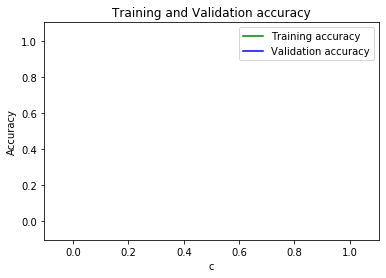

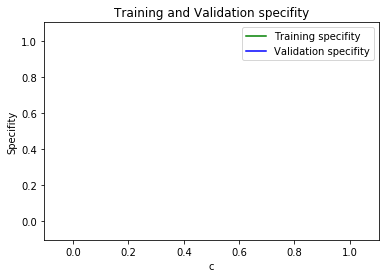

In [88]:
accuracy_val = []
accuracy_train = []
specifity_val  = []
specifity_train = []
gammas = []

for j in range(0,len(results_svc_c)-1)   : 
    accuracy_val.append(results_svc_c[j][5])
    accuracy_train.append(results_svc_c[j][2])
    specifity_val.append(results_svc_c[j][4])
    specifity_train.append(results_svc_c[j][1])
    gammas.append(results_svc_c[j][0])
    
plt.plot(gammas, accuracy_train, 'g', label='Training accuracy')
plt.plot(gammas, accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_svc_c_rbf.png')
plt.show()
    
plt.plot(gammas, specifity_train, 'g', label='Training specifity')
plt.plot(gammas, specifity_val, 'b', label='Validation specifity')
plt.title('Training and Validation specifity')
plt.xlabel('c')
plt.ylabel('Specifity')
plt.legend()
plt.savefig('specifity_svc_c_rbf.png')
plt.show()

In [89]:
start_time = time.time()
SVM_rbf_c = svm.SVC(C=1, kernel='rbf', degree=3, gamma=0.01)
SVM_rbf_c.fit(X,y_m)
    
train_time = time.time() - start_time

print ("train time for C=", '0.1', " : ", train_time, "seconds")
    

train time for C= 0.1  :  3208.9474401474 seconds


In [90]:
predicted_svm_rbf = []
for j in range(0,len(final_test['content'])):
    predicted_svm_rbf.append(SVM_rbf_c.predict(bow(final_test['content'][j], words).reshape(1,-1))[0])
#print("SVM Accuracy Score -> ",accuracy_score(predicted_svm_rbf, final_test['tag'])*100)


In [91]:

valid_final = pd.DataFrame({
                   'tag':final_test['tag'],
                    'tag_predicted': predicted_svm_rbf
                   }) 

TN = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']!=0)])
FP = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']!=0)])
TP = len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)])
FN = len(valid_final[(valid_final['tag_predicted']!=valid_final['tag']) & (valid_final['tag']==0)])
specifity =TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

results_rbf_acc3 = acc
results_rbf_spec3 = specifity

print('0,0', len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==0)]))
print('1,1', len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==1)]))
print('2,2', len(valid_final[(valid_final['tag_predicted']==valid_final['tag']) & (valid_final['tag']==2)]))
print('1,0', len(valid_final[(valid_final['tag']==1) & (valid_final['tag_predicted']==0)]))
print('1,2', len(valid_final[(valid_final['tag']==1) & (valid_final['tag_predicted']==2)]))
print('0,1', len(valid_final[(valid_final['tag']==0) & (valid_final['tag_predicted']==1)]))
print('0,2', len(valid_final[(valid_final['tag']==0) & (valid_final['tag_predicted']==2)]))
print('2,1', len(valid_final[(valid_final['tag']==2) & (valid_final['tag_predicted']==1)]))
print('2,0', len(valid_final[(valid_final['tag']==2) & (valid_final['tag_predicted']==0)]))



0,0 736
1,1 1
2,2 35
1,0 11
1,2 0
0,1 2
0,2 26
2,1 6
2,0 39


In [92]:
results_rbf_acc3

0.9018691588785047

In [93]:
results_rbf_spec3

0.391304347826087